# **Εργαστήριο**: "Νευρωνικά Δίκτυα και Ευφυή Υπολογιστικά Συστήματα"
## **Ασκηση 1: Dataset S01**

## Α. Στοιχεία ομάδας

### **Ομάδα M.Β.11**

- Αλεξόπουλος Άγγελος, el15404
- Γιαννακούλιας Γεώργιος, el15044
- Καλντής Μιχαήλ, el15123

<!-- | Επώνυμο | Όνομα  | ΑΜ |
|-------------------------|:----------:|---------:|
| Αλεξόπουλος   | Άγγελος  | el15404 |
| Γιαννακούλιας | Γεώργιος | el15044 |
| Καλντής        | Μιχαήλ  | el15123 |
|<img width=200/> |<img width=200/> |<img width=200/> | -->


In [0]:
## installations
!pip install --upgrade pip #upgrade pip package installer
!pip install --upgrade scikit-learn  #upgrade scikit-learn package
!pip install --upgrade numpy #upgrade numpy package
!pip install --upgrade pandas #upgrade pandas package
!pip install --upgrade scipy #upgrade scipy package
!pip install --upgrade tensorflow
!pip install -U imbalanced-learn


Requirement already up-to-date: pip in ./lib/python3.6/site-packages (19.3.1)
Requirement already up-to-date: scikit-learn in ./lib/python3.6/site-packages (0.22)
Requirement already up-to-date: numpy in ./lib/python3.6/site-packages (1.17.4)
Requirement already up-to-date: pandas in ./lib/python3.6/site-packages (0.25.3)
Requirement already up-to-date: scipy in ./lib/python3.6/site-packages (1.4.1)
Requirement already up-to-date: tensorflow in ./lib/python3.6/site-packages (2.0.0)
Requirement already up-to-date: imbalanced-learn in ./lib/python3.6/site-packages (0.6.1)


## Β. Εισαγωγή του dataset


#1)
Το datasets μας περιέχει ασθενείς που υποστήκαν καρδιακό επεισόδιο κάποια στιγμή στο παρελθόν. Μερικοί απ' αυτούς είναι εν ζωή, ενώ άλλοι όχι. Σκοπός μας είναι να προβλέψουμε, με βάση κάποιες παραμέτρους, αν ο ασθενής θα ζήσει ή όχι μετά από ένα χρόνο (προφανώς μας ενδιαφέρει να μπορέσουμε να προβλέψουμε ορθά αν ο ασθενής δε θα ζήσει).


#2)


In [0]:
import pandas as pd
import numpy as np
import sys


df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/echocardiogram/echocardiogram.data", header=None, error_bad_lines=False)
df

b'Skipping line 50: expected 13 fields, saw 14\n'


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,11,0,71,0,0.260,9,4.600,14,1,1,name,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
2,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,7.5,1,64,0,0.24,12.9,4.72,12,1,0.857,name,?,?
127,41,0,64,0,0.28,5.40,5.47,11,1.10,0.714,name,?,?
128,36,0,69,0,0.20,7.00,5.05,14.5,1.21,0.857,name,?,?
129,22,0,57,0,0.14,16.1,4.36,15,1.36,0.786,name,?,?


Είναι φανερό ότι έχουμε 131 δείγματα ασθενών και 12 χαρακτηριστικά (συν η τελευταία στήλη για το label).
Το label (όπου υπάρχει) μας δείχνει εάν ο ασθενής κατάφερε να επιβιώσει το πολύ ένα χρόνο (0: dead, 1:alive) και τα features του dataset περιέχουν τιμές σχετικές με την υγεία και την φυσιολογία του, με βάση τα οποία θα μπορέσουμε να κάνουμε τις προβλέψεις. 

Τα χαρακτηριστικά είναι αριθμητικά, εκτός από αυτό της στήλης 10 που είναι το όνομα του ασθενούς, το οποίο ωστόσο δε θα μας απασχολήσει. Τα χαρακτηριστικά, με βάση την περιγραφή τους και τις τιμές που παίρνουν, είναι διατεταγμένα (προφανώς δε αναφερόμαστε στο χαρακτηριστικό με το όνομα).


#3) 
Το αρχικό dataset δεν περιείχε αρίθμηση γραμμών όυτε στηλών. Ωστόσο το pandas εισάγει αυτόματη αρίθμηση.

#4)

In [0]:
df.loc[:,12]

0      0
1      0
2      0
3      0
4      0
      ..
126    ?
127    ?
128    ?
129    ?
130    ?
Name: 12, Length: 131, dtype: object

Οι ετικέτες των κλάσεων όπως προαναφέρθηκε βρίσκονται στην τελευταία κολώνα του dataframe (κολώνα 12). Είναι '0' για νεκρός και '1' για ζωντανός. Ωστόσο, υπάρχουν και '?', που δηλώνουν ότι δεν είναι γνωστό αν ο ασθενής είναι ζωντανός ή νεκρός. Προφανώς, θα αγνοήσουμε τους ασθενείς που στο πεδίο αυτό έχουν απροσδιόριστη τιμή, μιας και δε βοηθάει σε κάτι το μοντέλο μας όταν δεν ξέρουμε την τελική κατάστασή του.

#5) 
Δεν χρειάστηκε να κάνουμε μετρατροπές στο αρχείο text, καθώς δεν υπήρχαν κενές γραμμές ή στοιχεία.

#6)
Υπάρχουν απουσιάζουσες τιμές, οι οποίες δηλώνονται με το '?'. Πριν βρούμε τα ζητούμενα ποσοστά, είναι σημαντικό να αφαιρέσουμε όπως είπαμε νωρίτερα τα δείγματα που έχουν απροσδιόριστη τιμή label. Θα αφαιρέσουμε επίσης τις στήλες 0,1,9,10,11 όπως περιγράφεται στο FAQ, προκειμένου να μην παίρνουμε πολύ υψηλές τιμές.

In [0]:
df = df[df[12] != '?'] # remove samples with no label
df = df.drop(columns=[0,1,9,10,11]) # remove columns 0,1,9,10,11
print(df)


     2   3      4       5      6      7      8  12
0    71   0  0.260       9  4.600     14      1  0
1    72   0  0.380       6  4.100     14  1.700  0
2    55   0  0.260       4  3.420     14      1  0
3    60   0  0.253  12.062  4.603     16  1.450  0
4    57   0  0.160      22  5.750     18  2.250  0
..   ..  ..    ...     ...    ...    ...    ... ..
103  63   0   0.30     6.9   3.52  18.16   1.51  1
104  59   0   0.17    14.3   5.49   13.5   1.50  0
105  57   0  0.228     9.7   4.29     11      1  0
107  78   0   0.23      40   6.23     14    1.4  1
108  62   0   0.26     7.6   4.42     14      1  1

[74 rows x 8 columns]


In [0]:

labels_df = df.iloc[:, -1:] # labels in the last column
labels = labels_df.values.flatten()
features_df = df.iloc[:, 0:-1] # attributes in columns 2-8
features = features_df.values
print(labels.shape)
print(features.shape)

(74,)
(74, 7)


Τώρα, θα βρούμε τα ζητούμενα ποσοστά:

In [0]:
# check for missing values
features_t = features.T[:,:]
print('Total missing values : ', sum(sum(features == '?')))
print('Samples with missing values (at least 1): ', sum((sum(features_t == '?')) != 0))
print('Percentage of samples with missing values (at least 1): ', sum((sum(features_t == '?')) != 0) / features.shape[0])

Total missing values :  21
Samples with missing values (at least 1):  12
Percentage of samples with missing values (at least 1):  0.16216216216216217


#7)
Στο dataset εμφανίζονται οι κλάσεις [0, 1]

Για τα ζητούμενα ποσοστά έχουμε:


In [0]:
# We have 2 classes
# count frequencies of each class

labels = labels.astype(int)
frequencies = np.bincount((labels))
print('frequency of class 0: ', frequencies[0])
print('frequency of class 1: ', frequencies[1])
percentages = (frequencies / sum(frequencies))*100
print('percentage of class 0: ', percentages[0])
print('percentage of class 1: ', percentages[1])
print('percentage of class 0 over class 1: ', frequencies[0]/frequencies[1])

frequency of class 0:  50
frequency of class 1:  24
percentage of class 0:  67.56756756756756
percentage of class 1:  32.432432432432435
percentage of class 0 over class 1:  2.0833333333333335


#8)

In [0]:
from sklearn.impute import SimpleImputer

features[features=='?'] = np.nan
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(features)
features = imp.transform(features)

#split train-test set
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.2)

Επιλέγουμε να διαχειριστούμε τις απουσιάζουσες τιμές ως εξής: θα αντικαταστήσουμε τις τιμές αυτές με το μέσο όρο του feature στο οποίο αντιστοιχούν. Με αυτόν τον τρόπο δεν μειώνουμε περαιτέρω το μέγεθος του dataset που είναι ήδη αρκετά μικρό, ενώ ακόμη η χρήση της μέσης τιμής δεν επηρεάζει αρνητικά την εκπαίδευση των ταξινομητών αργότερα. Αρχικά, αντικαθιστούμε τα **?** με **nan** και στη συνέχεια γίνεται αντικατάσταση των **nan** με τη μέση τιμή του feature που αντιστοιχούν.

Η αξιολόγηση των ταξινομητών γίνεται πάντα σε δεδομένα που δεν έχουν δει κατά την εκπαίδευση έτσι ώστε να αξιολογήσουμε τη δυνατότητα γενίκευσής τους. Συνεπώς, πρoτού φτιάξουμε το μοντέλο κάθε ταξινομητή χωρίζουμε τα δεδομένα μας τυχαία σε ένα σύνολο εκπαίδευσης (train set) και ένα σύνολο ελέγχου (test set).

Χρησιμοποιούμε το train set για να εκτιμούμε και να βελτιώνουμε το μοντέλο του ταξινομητή κατά την ανάπτυξή του.

Χρησιμοποιούμε μετά το test set για να αξιολογήσουμε στατιστικά την απόδοση του μοντέλου μας.

Το sklearn έχει τη συνάρτηση train_test_split() που ανακατεύει τυχαία τα δείγματα και τα διαχωρίζει σε train και test με βάση κάποιο ποσοστό που θα της δώσουμε, το οποίο αντιστοιχεί στο test set (20% εδώ).

## Γ. Baseline classification


#1) 

In [0]:
#function for plotting confusion matrix
#source: https://www.kaggle.com/grfiv4/plot-a-confusion-matrix

import matplotlib.pyplot as plt
import itertools



def plot_confusion_matrix(cm, target_names, title):
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix ' + title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)


    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="red")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

Uniform:

confusion matrix
 [[7 5]
 [2 1]]


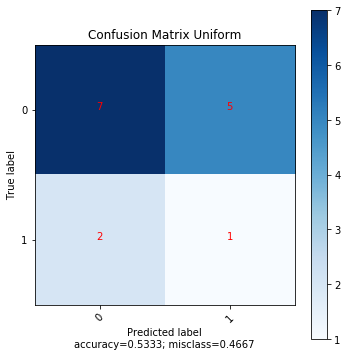

Precision: 0.533
Recall: 0.533
f1_micro: 0.533 

Precision: 0.472
Recall: 0.458
f1_macro: 0.444 



Constant 0:

confusion matrix
 [[12  0]
 [ 3  0]]


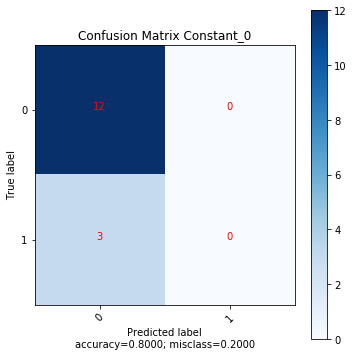

Precision: 0.800
Recall: 0.800
f1_micro: 0.800 

Precision: 0.400
Recall: 0.500
f1_macro: 0.444 



Constant 1:

confusion matrix
 [[ 0 12]
 [ 0  3]]


/home/mike/jubyter/my_project_env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


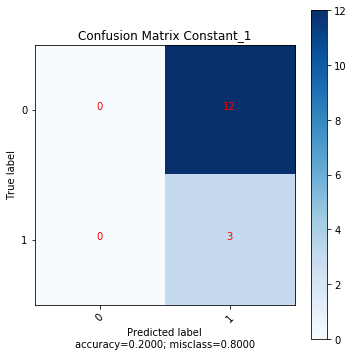

Precision: 0.200
Recall: 0.200
f1_micro: 0.200 

Precision: 0.100
Recall: 0.500
f1_macro: 0.167 



Most Frequent:

confusion matrix
 [[12  0]
 [ 3  0]]


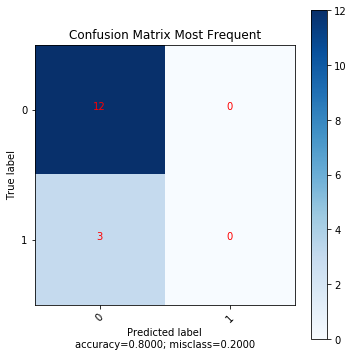

Precision: 0.800
Recall: 0.800
f1_micro: 0.800 

Precision: 0.400
Recall: 0.500
f1_macro: 0.444 



Stratified:

confusion matrix
 [[4 8]
 [2 1]]


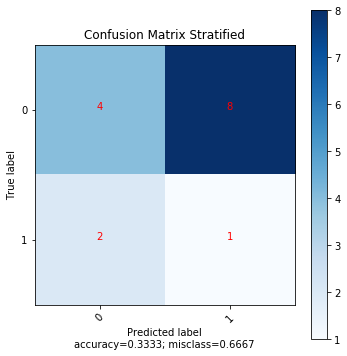

Precision: 0.333
Recall: 0.333
f1_micro: 0.333 

Precision: 0.389
Recall: 0.333
f1_macro: 0.306 



In [0]:
# Dummy classifiers

from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

f1_micro_total = []
f1_macro_total = []


# uniform
print("Uniform:\n")
dc_uniform = DummyClassifier(strategy="uniform")
dc_uniform.fit(train, train_labels)
pred = dc_uniform.predict(test)
cnf_matrix = confusion_matrix(test_labels, pred)
print('confusion matrix\n', cnf_matrix)
plot_confusion_matrix(cnf_matrix, [0,1], 'Uniform')

precision, recall, f1_micro, _ = precision_recall_fscore_support(test_labels, pred, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro))
precision, recall, f1_macro, _ = precision_recall_fscore_support(test_labels, pred, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro))

f1_micro_total.append(f1_micro)
f1_macro_total.append(f1_macro)

# constant 0
print("\n\nConstant 0:\n")
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
dc_constant_0.fit(train, train_labels)
pred = dc_constant_0.predict(test)
cnf_matrix = confusion_matrix(test_labels, pred)
print('confusion matrix\n', cnf_matrix)
plot_confusion_matrix(cnf_matrix, [0,1], 'Constant_0')

precision, recall, f1_micro, _ = precision_recall_fscore_support(test_labels, pred, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro))
precision, recall, f1_macro, _ = precision_recall_fscore_support(test_labels, pred, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro))

f1_micro_total.append(f1_micro)
f1_macro_total.append(f1_macro)



# constant 1
print("\n\nConstant 1:\n")
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_constant_1.fit(train, train_labels)
pred = dc_constant_1.predict(test)
cnf_matrix = confusion_matrix(test_labels, pred)
print('confusion matrix\n', cnf_matrix)
plot_confusion_matrix(cnf_matrix, [0,1], 'Constant_1')

precision, recall, f1_micro, _ = precision_recall_fscore_support(test_labels, pred, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro))
precision, recall, f1_macro, _ = precision_recall_fscore_support(test_labels, pred, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro))

f1_micro_total.append(f1_micro)
f1_macro_total.append(f1_macro)



# most_frequent
print("\n\nMost Frequent:\n")
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_most_frequent.fit(train, train_labels)
pred = dc_most_frequent.predict(test)
cnf_matrix = confusion_matrix(test_labels, pred)
print('confusion matrix\n', cnf_matrix)
plot_confusion_matrix(cnf_matrix, [0,1], 'Most Frequent')

precision, recall, f1_micro, _ = precision_recall_fscore_support(test_labels, pred, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro))
precision, recall, f1_macro, _ = precision_recall_fscore_support(test_labels, pred, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro))

f1_micro_total.append(f1_micro)
f1_macro_total.append(f1_macro)



#stratified
print("\n\nStratified:\n")
dc_stratified = DummyClassifier(strategy="stratified")
dc_stratified.fit(train, train_labels)
pred = dc_stratified.predict(test)
cnf_matrix = confusion_matrix(test_labels, pred)
print('confusion matrix\n', cnf_matrix)
plot_confusion_matrix(cnf_matrix, [0,1], 'Stratified')

precision, recall, f1_micro, _ = precision_recall_fscore_support(test_labels, pred, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro))
precision, recall, f1_macro, _ = precision_recall_fscore_support(test_labels, pred, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro))

f1_micro_total.append(f1_micro)
f1_macro_total.append(f1_macro)



confusion matrix
 [[11  1]
 [ 2  1]]


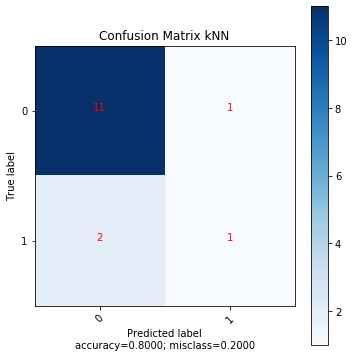

Precision: 0.800
Recall: 0.800
f1_micro: 0.800 

Precision: 0.673
Recall: 0.625
f1_macro: 0.640 



In [0]:
# kNN

from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier()
knn.fit(train, train_labels)
pred_knn = knn.predict(test)
cnf_matrix_knn = confusion_matrix(test_labels, pred_knn)
print('confusion matrix\n', cnf_matrix_knn)
plot_confusion_matrix(cnf_matrix_knn, [0,1], 'kNN')

precision, recall, f1_micro_knn, _ = precision_recall_fscore_support(test_labels, pred_knn, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro_knn))
precision, recall, f1_macro_knn, _ = precision_recall_fscore_support(test_labels, pred_knn, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro_knn))

f1_micro_total.append(f1_micro_knn)
f1_macro_total.append(f1_macro_knn)

#2) 
Για κάθε averaged metric, εκτυπώνουμε bar plot συγκρισης με τις τιμές του συγκεκριμένου f1 για όλους τους classifiers

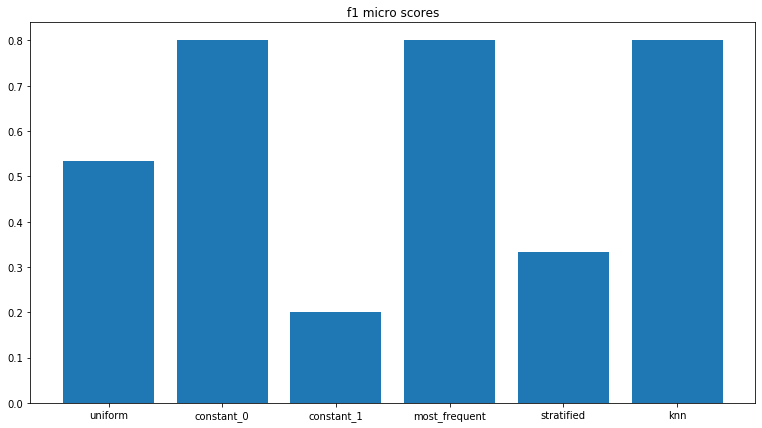

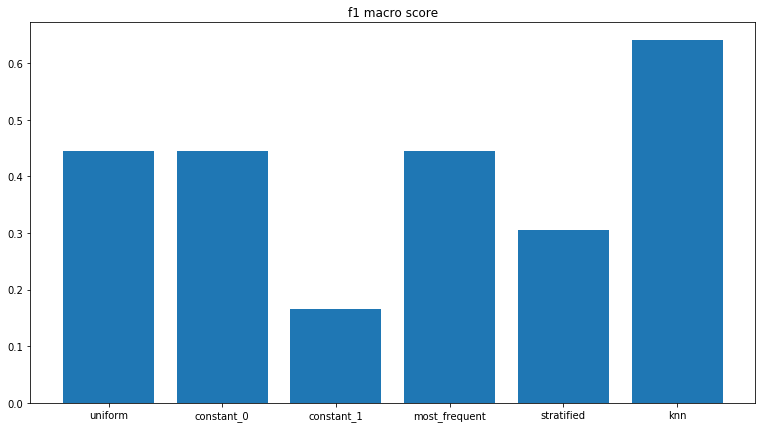

In [0]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(13,7))
classifiers = ['uniform', 'constant_0', 'constant_1', 'most_frequent', 'stratified', 'knn']
ax.bar(classifiers, f1_micro_total, width=0.8)
ax.set_title('f1 micro scores')

fig, ax = plt.subplots(figsize=(13,7))
ax.bar(classifiers, f1_macro_total, width=0.8)
ax.set_title('f1 macro score')

plt.show()

#3)

Το πιο σημαντικό που αξίζει να σημειώσουμε για το dataset που μας δίνεται είναι ότι έχει **πολύ λίγα δείγματα** (μόλις 74 μετά από την αφαίρεση όσων έχουν '?' στο label), οπότε τα αποτελέσματα των ταξινομητών είναι ευάλωτα στην επιλογή των train και test set. 



*   Για τον *uniform* ταξινομητή, παρατηρούμε ότι τα f1 macro και f1 micro έχουν τιμές που δεν είναι σταθερές αν επαναλάβουμε την ίδια διαδικασία, μιας και η επιλογή είναι τυχαία. 

*   Για τους *constant 0* και *constant 1* ταξινομητές, είναι λογικό ο constant 0 να έχει καλύτερο σκορ, μιας και η κλάση 0 έχει τα περισσότερα δείγματα. Ωστόσο, είναι λογικό το τελικό σκορ του καθένα να επηρεάζεται από την επιλογή του train και test set.

*   Για τον *most frequent* ταξινομητή, οι μετρικές f1 macro και f1 micro είναι ακριβώς ίσες με εκείνες του ταξινομητή constant 0, μιας και είναι η συχνότερη κλάση.


*   Για τον *stratified* ταξινομητή, παρατηρούμε ότι έχει καλύτερα αποτελέσματα από τους 4 προηγούμενους, καθώς ταξινομεί με βάση τα ποσοστά των κλάσεων στο training set. 

*   Για τον *knn* ταξινομητή, οι μετρικές μας παίρνουν τις καλύτερες τιμές. Αυτό είναι αναμενόμενο αφού ο συγκεκριμένος αλγόριθμος έχει περισσότερο "μυαλό" (είναι και ο μόνος που αξιοποιεί τα χαρακτηριστικά που δίνονται για κάθε δείγμα κατά την εκπαίδευση). Στο συγκεκριμένο dataset, ακόμα και μια αρκετά απλή εκδοχή του δίνει πολύ καλά αποτελέσματα.

## Δ. Βελτιστοποίηση ταξινομητών


#1)


**Προεπεξεργασία** **Δεδομένων**

*    ***Επιλογή χαρακτηριστικών***: ελέγχουμε αν υπάρχουν δεδομένα με μηδενική (ή  περίπου) διακύμανση (δε θα προσφέρουν σημαντικά στη διαχωριστική ικανότητα του ταξινομητή)

In [0]:
from sklearn.feature_selection import VarianceThreshold

Xvar = np.var(train, axis=0)
print("The variances of features:\n", Xvar)

selector = VarianceThreshold()
train_reduced = selector.fit_transform(train)
mask = selector.get_support()
print("\nThe mask is: ", mask)
test_reduced = test[:,mask]

The variances of features:
 [5.58466104e+01 1.80982476e-01 1.35270286e-02 4.80999030e+01
 5.73780647e-01 3.28317715e+01 2.09522103e-01]

The mask is:  [ True  True  True  True  True  True  True]


Παρατηρούμε ότι δεν χρειάζεται να αφαιρέσουμε κανένα feature από το dataset μας. Συνεχίζουμε με την προεπεξεργασία των δεδομένων.

*    ***Κανονικοποίηση χαρακτηριστικών***: ελέγχουμε αν υπάρχουν χαρακτηριστικά με πολύ μεγάλες διαφορές στις απόλυτες τιμές τους, καθώς μπορούν να προκαλέσουν προβλήματα στην εκπαίδευση και να δώσουν ταξινομητές με μη βέλτιστη απόδοση

In [0]:
from sklearn import preprocessing

# choose either 'standard' ή 'minmax' scaling
scaler = 'standard'
#scaler = 'minmax'

if (scaler == 'standard'):
  # standard scaling
  standard_scaler = preprocessing.StandardScaler().fit(train_reduced)
  train_scaled = standard_scaler.transform(train_reduced)
  test_scaled = standard_scaler.transform(test_reduced)
  print('Standard Scaler chosen')
elif (scaler == 'minmax'):
  #min-max scaling
  minmax_scaler = preprocessing.MinMaxScaler()
  train_scaled = minmax_scaler.fit_transform(train_reduced)
  test_scaled = minmax_scaler.transform(test_reduced)
  print('MinMax Scaler chosen')

Standard Scaler chosen


*    ***Εξισορρόπηση μη ισορροπημένων datasets***: οι περισσότεροι ταξινομητές εκπαιδεύονται καλύτερα όταν τα δείγματα όλων των κλάσεων είναι σχετικά ισάριθμα.

In [0]:
from imblearn.over_sampling import RandomOverSampler


sum_of_alive = sum(train_labels==1)
sum_of_dead = sum(train_labels==0)
print('Elements of category 1: ', sum_of_alive)
print('Elements of category 0: ', sum_of_dead)

if ( ((sum_of_alive / sum_of_dead <= 2.0/3) and (sum_of_alive < sum_of_dead)) or ((sum_of_dead / sum_of_alive <= 2.0/3) and (sum_of_alive > sum_of_dead)) ):
  ros = RandomOverSampler(random_state=0)
  train_resampled, train_labels_resampled = ros.fit_sample(train_scaled,train_labels)
  sum_of_alive = sum(train_labels_resampled==1)
  sum_of_dead = sum(train_labels_resampled==0)
  print('Balancing needed')
  print('Elements of category 1 after balancing: ', sum_of_alive)
  print('Elements of category 0 after balancing: ', sum_of_dead)

else:
  train_resampled = train_scaled
  train_labels_resampled = train_labels
  print('No balancing needed')


Elements of category 1:  21
Elements of category 0:  38
Balancing needed
Elements of category 1 after balancing:  38
Elements of category 0 after balancing:  38


Όταν ο λόγος μεταξύ του αριθμού των δειγμάτων δύο κλάσεων αρχίζει να είναι μικρότερος από 2:3, τότε έχουμε μη ισορροπημένο dataset. Κάνουμε οπότε τη διαδικασία για την εξισορρόπιση σε περίπτωση που χρειαστεί.

**Σημείωση:** 
Για να κρατήσουμε τη σύμβαση των ονομάτων των μεταβλητών όπως στα παραπάνω ερωτήματα, αλλάζουμε τα ονόματα στις μεταβλητές train_resampled και train_labels_resampled σε train και train_labels αντίστοιχα και στην test_scaled σε test.

In [0]:
train = train_resampled
train_labels = train_labels_resampled
test = test_scaled

print(train.shape)
print(train_labels.shape)

(76, 7)
(76,)


**Ξεκινάμε με τους DummyClassifiers:**

Uniform:

confusion matrix
 [[7 5]
 [2 1]]


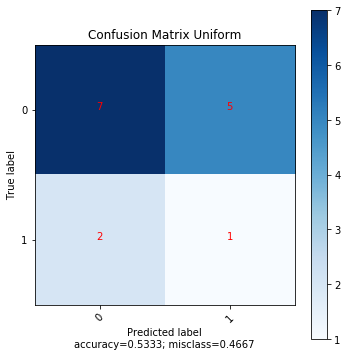

Precision: 0.533
Recall: 0.533
f1_micro: 0.533 

Precision: 0.472
Recall: 0.458
f1_macro: 0.444 



Constant 0:

confusion matrix
 [[12  0]
 [ 3  0]]


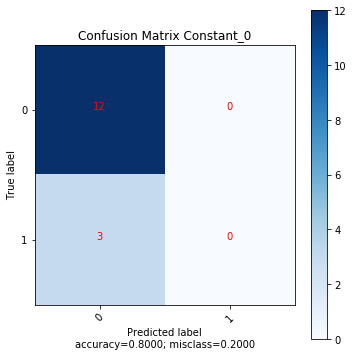

Precision: 0.800
Recall: 0.800
f1_micro: 0.800 

Precision: 0.400
Recall: 0.500
f1_macro: 0.444 



Constant 1:

confusion matrix
 [[ 0 12]
 [ 0  3]]


/home/mike/jubyter/my_project_env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


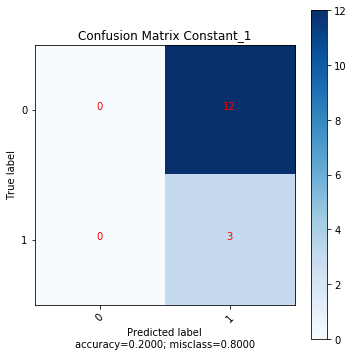

Precision: 0.200
Recall: 0.200
f1_micro: 0.200 

Precision: 0.100
Recall: 0.500
f1_macro: 0.167 



Most Frequent:

confusion matrix
 [[12  0]
 [ 3  0]]


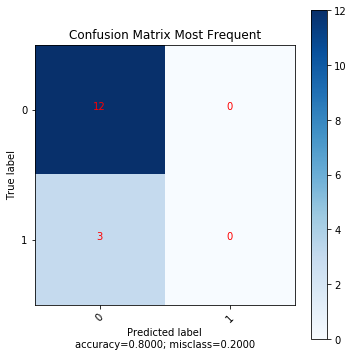

Precision: 0.800
Recall: 0.800
f1_micro: 0.800 

Precision: 0.400
Recall: 0.500
f1_macro: 0.444 



Stratified:

confusion matrix
 [[8 4]
 [2 1]]


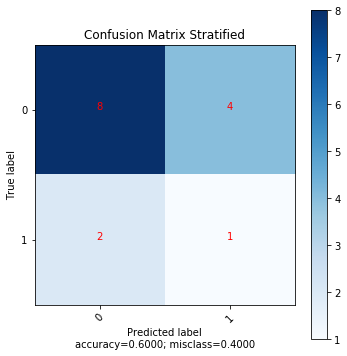

Precision: 0.600
Recall: 0.600
f1_micro: 0.600 

Precision: 0.500
Recall: 0.500
f1_macro: 0.489 



In [0]:
# Dummy Classifiers
import time


f1_micro_total_opt = []
f1_macro_total_opt = []


# uniform
print("Uniform:\n")
dc_uniform = DummyClassifier(strategy="uniform")
start_time = time.time()
dc_uniform.fit(train, train_labels)
uniform_fit_time = time.time() - start_time
start_time = time.time()
pred = dc_uniform.predict(test)
uniform_predict_time = time.time()-start_time

cnf_matrix = confusion_matrix(test_labels, pred)
print('confusion matrix\n', cnf_matrix)
plot_confusion_matrix(cnf_matrix, [0,1], 'Uniform')

precision, recall, f1_micro, _ = precision_recall_fscore_support(test_labels, pred, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro))
precision, recall, f1_macro, _ = precision_recall_fscore_support(test_labels, pred, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro))

f1_micro_total_opt.append(f1_micro)
f1_macro_total_opt.append(f1_macro)



# constant 0
print("\n\nConstant 0:\n")
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
start_time = time.time()
dc_constant_0.fit(train, train_labels)
constant0_fit_time = time.time() - start_time
start_time = time.time()
pred = dc_constant_0.predict(test)
constant0_predict_time = time.time() - start_time

cnf_matrix = confusion_matrix(test_labels, pred)
print('confusion matrix\n', cnf_matrix)
plot_confusion_matrix(cnf_matrix, [0,1], 'Constant_0')

precision, recall, f1_micro, _ = precision_recall_fscore_support(test_labels, pred, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro))
precision, recall, f1_macro, _ = precision_recall_fscore_support(test_labels, pred, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro))

f1_micro_total_opt.append(f1_micro)
f1_macro_total_opt.append(f1_macro)



# constant 1
print("\n\nConstant 1:\n")
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
start_time = time.time()
dc_constant_1.fit(train, train_labels)
constant1_fit_time = time.time() - start_time
start_time = time.time()
pred = dc_constant_1.predict(test)
constant1_predict_time = time.time() - start_time

cnf_matrix = confusion_matrix(test_labels, pred)
print('confusion matrix\n', cnf_matrix)
plot_confusion_matrix(cnf_matrix, [0,1], 'Constant_1')

precision, recall, f1_micro, _ = precision_recall_fscore_support(test_labels, pred, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro))
precision, recall, f1_macro, _ = precision_recall_fscore_support(test_labels, pred, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro))

f1_micro_total_opt.append(f1_micro)
f1_macro_total_opt.append(f1_macro)



# most_frequent
print("\n\nMost Frequent:\n")
dc_most_frequent = DummyClassifier(strategy="most_frequent")
start_time = time.time()
dc_most_frequent.fit(train, train_labels)
most_frequent_fit_time = time.time() - start_time
start_time = time.time()
pred = dc_most_frequent.predict(test)
most_frequent_predict_time = time.time() - start_time

cnf_matrix = confusion_matrix(test_labels, pred)
print('confusion matrix\n', cnf_matrix)
plot_confusion_matrix(cnf_matrix, [0,1], 'Most Frequent')

precision, recall, f1_micro, _ = precision_recall_fscore_support(test_labels, pred, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro))
precision, recall, f1_macro, _ = precision_recall_fscore_support(test_labels, pred, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro))

f1_micro_total_opt.append(f1_micro)
f1_macro_total_opt.append(f1_macro)



#stratified
print("\n\nStratified:\n")
dc_stratified = DummyClassifier(strategy="stratified")
start_time = time.time()
dc_stratified.fit(train, train_labels)
stratified_fit_time = time.time() - start_time
start_time = time.time()
pred = dc_stratified.predict(test)
stratified_predict_time = time.time() - start_time

cnf_matrix = confusion_matrix(test_labels, pred)
print('confusion matrix\n', cnf_matrix)
plot_confusion_matrix(cnf_matrix, [0,1], 'Stratified')

precision, recall, f1_micro, _ = precision_recall_fscore_support(test_labels, pred, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro))
precision, recall, f1_macro, _ = precision_recall_fscore_support(test_labels, pred, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro))

f1_micro_total_opt.append(f1_micro)
f1_macro_total_opt.append(f1_macro)

**Υλοποιούμε στη συνέχεια μια δικιά μας crossvalidation:**

In [0]:
# homemade cross validation

# we are gonna split the elements in given number of slices
# 0: the first slice, (slices - 1): the last slice

# returns index of first element of block id
def block_low(id, slices, elements):
  return id * elements // slices

# returns index of last element of block id
def block_high(id, slices, elements):
  return block_low(id+1, slices, elements) - 1

# returns number of elements in block id
# def block_size(id, slices, elements):
#   return block_high(id, slices, elements) - block_low(id, slices, elements) + 1

# def block_info(id, slices, elements):
#   # returns a tuple with the index of first element, the index of last element and the number of elements of the block
#   return (block_low(id, slices, elements), block_high(id, slices, elements), block_size(id, slices, elements))

# for i in range(0, sl):
#   print(block_info(i, sl, el))

# given a train set
# folds = 10
# els = 148 # number of elements
# train =  [i for i in range(0,els)]
# train_labels = [0] * 100 + (els-100)*[1]

# def crossvalidation(classifier, train, train_labels, folds):
#   els = len(train)
#   scores = []
#   for i in range(0, folds):
#     # split one fold for testing and rest for training
#     train_fold = np.concatenate((train[0:block_low(i, folds, els)], train[block_high(i, folds, els)+1:els]))
#     train_fold_labels = np.concatenate((train_labels[0:block_low(i, folds, els)], train_labels[block_high(i, folds, els)+1:els]))
#     test_fold = train[block_low(i, folds, els):block_high(i, folds, els)+1]
#     test_fold_labels = train_labels[block_low(i, folds, els):block_high(i, folds, els)+1]
#     # train classifier and add accuracy
#     classifier.fit(train_fold, train_fold_labels)
#     scores.append(classifier.score(test_fold, test_fold_labels))
#   return scores


def crossvalidation(classifier, train, train_labels, folds, metric=' '):
  els = len(train)
  scores = []
  for i in range(0, folds):
    # split one fold for testing and rest for training
    train_fold = np.concatenate((train[0:block_low(i, folds, els)], train[block_high(i, folds, els)+1:els]))
    train_fold_labels = np.concatenate((train_labels[0:block_low(i, folds, els)], train_labels[block_high(i, folds, els)+1:els]))
    test_fold = train[block_low(i, folds, els):block_high(i, folds, els)+1]
    test_fold_labels = train_labels[block_low(i, folds, els):block_high(i, folds, els)+1]
    # train classifier and add accuracy
    classifier.fit(train_fold, train_fold_labels)
    preds = classifier.predict(test_fold)
    if (metric=='micro'):
      (_, _, score, _) = precision_recall_fscore_support(test_fold_labels, preds, average='micro')
    elif (metric=='macro'):
      (_, _, score, _) = precision_recall_fscore_support(test_fold_labels, preds, average='macro')
    else:
      score = classifier.score(test_fold, test_fold_labels)
    scores.append(score)
  return scores

**Καθώς και μία gridsearch για το kNN:**

In [0]:
# gridsearch for knn

def kNN_gridsearch(k, train, train_labels, metric='accuracy'):
    scores = []
    folds = 10
    neighbors = [i for i in range(1,k+1,1)]
    for i in neighbors:
        knn = KNeighborsClassifier(n_neighbors=i)
        results = crossvalidation(knn, train, train_labels, folds, metric)
        scores.append(np.mean(results))
    max_value = max(scores)
    max_index = scores.index(max_value)
    return neighbors[max_index]


Και έπειτα παίρνουμε τα αποτελέσματα για την καλύτερη παράμετρο που βρήκαμε:

1
confusion matrix
 [[12  0]
 [ 2  1]]


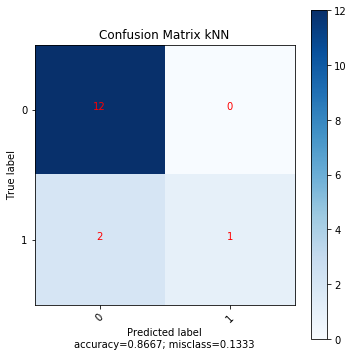

Precision: 0.867
Recall: 0.867
f1_micro: 0.867 

Precision: 0.929
Recall: 0.667
f1_macro: 0.712 



In [0]:
import time 

k_best = kNN_gridsearch(19, train, train_labels, 'micro')
# βγάζει error όταν δεν περιέχονται και οι δύο προβλέψεις κλάσεων
# TODO, όνομα = accuracy??
# https://stackoverflow.com/questions/43162506/undefinedmetricwarning-f-score-is-ill-defined-and-being-set-to-0-0-in-labels-wi

print(k_best)

knn = KNeighborsClassifier(n_neighbors=k_best)
start_time = time.time()
knn.fit(train, train_labels)
knn_fit_time = time.time() - start_time
start_time = time.time()
pred_knn = knn.predict(test)
knn_predict_time = time.time() - start_time

cnf_matrix_knn = confusion_matrix(test_labels, pred_knn)
print('confusion matrix\n', cnf_matrix_knn)
plot_confusion_matrix(cnf_matrix_knn, [0,1], 'kNN')

precision, recall, f1_micro_knn, _ = precision_recall_fscore_support(test_labels, pred_knn, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro_knn))
precision, recall, f1_macro_knn, _ = precision_recall_fscore_support(test_labels, pred_knn, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro_knn))

f1_micro_total_opt.append(f1_micro_knn)
f1_macro_total_opt.append(f1_macro_knn)

#2)

Για το τελικό fit του κάθε ταξινομητή στο σύνολο του training set και για το predict στο test set, εκτυπώνουμε πίνακες με τους χρόνους εκτέλεσης:

In [0]:
time = pd.DataFrame(columns=['Classifiers', 'Fit', 'Predict'])

time.loc[0, 'Classifiers'] = 'Uniform' 
time.loc[0, 'Fit'] = uniform_fit_time
time.loc[0, 'Predict'] = uniform_predict_time

time.loc[1, 'Classifiers'] = 'Constant 0' 
time.loc[1, 'Fit'] = constant0_fit_time
time.loc[1, 'Predict'] = constant0_predict_time

time.loc[2, 'Classifiers'] = 'Constant 1' 
time.loc[2, 'Fit'] = constant1_fit_time
time.loc[2, 'Predict'] = constant1_predict_time

time.loc[2, 'Classifiers'] = 'Most Frequent' 
time.loc[2, 'Fit'] = most_frequent_fit_time
time.loc[2, 'Predict'] = most_frequent_predict_time

time.loc[3, 'Classifiers'] = 'Stratified' 
time.loc[3, 'Fit'] = stratified_fit_time
time.loc[3, 'Predict'] = stratified_predict_time

time.loc[4, 'Classifiers'] = 'kNN' 
time.loc[4, 'Fit'] = knn_fit_time
time.loc[4, 'Predict'] = knn_predict_time


print(time)



     Classifiers          Fit      Predict
0        Uniform  0.000310183  0.000141859
1     Constant 0  0.000186443  8.34465e-05
2  Most Frequent  0.000376463  0.000127792
3     Stratified  0.000157595  0.000323772
4            kNN  0.000503302  0.000832796


#3)

Για κάθε averaged metric, εκτυπώνουμε bar plot συγκρισης με τις τιμές του συγκεκριμένου f1 για όλους τους classifiers

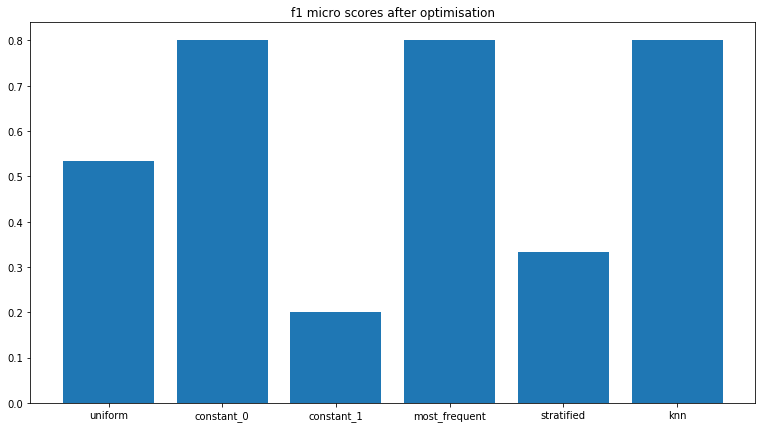

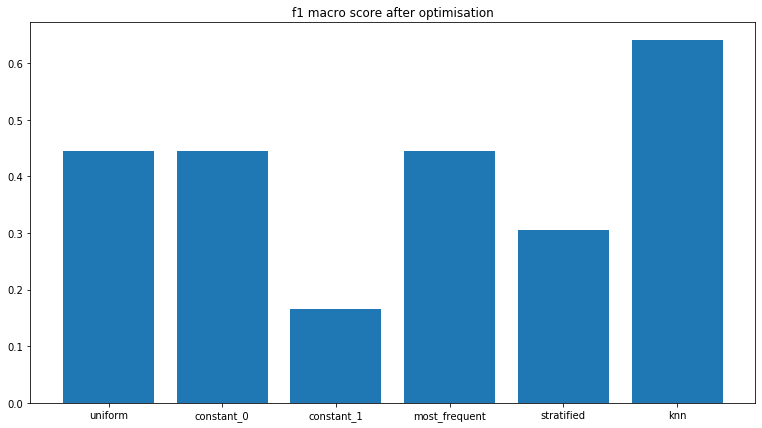

In [0]:
fig, ax = plt.subplots(figsize=(13,7))
classifiers = ['uniform', 'constant_0', 'constant_1', 'most_frequent', 'stratified', 'knn']
ax.bar(classifiers, f1_micro_total, width=0.8)
ax.set_title('f1 micro scores after optimisation')

fig, ax = plt.subplots(figsize=(13,7))
ax.bar(classifiers, f1_macro_total, width=0.8)
ax.set_title('f1 macro score after optimisation')

plt.show()

#4)

Για τον πίνακα με τη μεταβολή της επίδοσης των ταξινομητών πριν και μετά τη βελτιστοποίησή τους, έχουμε:

In [0]:
perf = pd.DataFrame(columns=['f1-micro before', 'f1-micro after', 'f1-macro before', 'f1-macro-after'])

perf.loc['Uniform', 'f1-micro before'] = f1_micro_total[0].round(3)
perf.loc['Uniform', 'f1-micro after'] = f1_micro_total_opt[0].round(3)
perf.loc['Uniform', 'f1-macro before'] = f1_macro_total[0].round(3)
perf.loc['Uniform', 'f1-macro-after'] = f1_macro_total_opt[0].round(3)

perf.loc['Constant 0', 'f1-micro before'] = f1_micro_total[1].round(3)
perf.loc['Constant 0', 'f1-micro after'] = f1_micro_total_opt[1].round(3)
perf.loc['Constant 0', 'f1-macro before'] = f1_macro_total[1].round(3)
perf.loc['Constant 0', 'f1-macro-after'] = f1_macro_total_opt[1].round(3)

perf.loc['Constant 1', 'f1-micro before'] = f1_micro_total[2].round(3)
perf.loc['Constant 1', 'f1-micro after'] = f1_micro_total_opt[2].round(3)
perf.loc['Constant 1', 'f1-macro before'] = f1_macro_total[2].round(3)
perf.loc['Constant 1', 'f1-macro-after'] = f1_macro_total_opt[2].round(3)

perf.loc['Most Frequent', 'f1-micro before'] = f1_micro_total[3].round(3)
perf.loc['Most Frequent', 'f1-micro after'] = f1_micro_total_opt[3].round(3)
perf.loc['Most Frequent', 'f1-macro before'] = f1_macro_total[3].round(3)
perf.loc['Most Frequent', 'f1-macro-after'] = f1_macro_total_opt[3].round(3)

perf.loc['Stratified', 'f1-micro before'] = f1_micro_total[4].round(3)
perf.loc['Stratified', 'f1-micro after'] = f1_micro_total_opt[4].round(3)
perf.loc['Stratified', 'f1-macro before'] = f1_macro_total[4].round(3)
perf.loc['Stratified', 'f1-macro-after'] = f1_macro_total_opt[4].round(3)

perf.loc['kNN', 'f1-micro before'] = f1_micro_total[5].round(3)
perf.loc['kNN', 'f1-micro after'] = f1_micro_total_opt[5].round(3)
perf.loc['kNN', 'f1-macro before'] = f1_macro_total[5].round(3)
perf.loc['kNN', 'f1-macro-after'] = f1_macro_total_opt[5].round(3)


pd.set_option('display.max_columns', None)

print(perf)

              f1-micro before f1-micro after f1-macro before f1-macro-after
Uniform                 0.533          0.533           0.444          0.444
Constant 0                0.8            0.8           0.444          0.444
Constant 1                0.2            0.2           0.167          0.167
Most Frequent             0.8            0.8           0.444          0.444
Stratified              0.333            0.6           0.306          0.489
kNN                       0.8          0.867            0.64          0.712


#5)

Παρατηρούμε ότι όλοι οι χρόνοι είναι μικροί, καθώς το dataset είναι μικρό και η αρχιτεκτονική των ταξινομητών απλή. Τον μεγαλύτερο χρόνο για fit και predict έχει ο KNN, κάτι που αναμέναμε, αφού οι dummy ταξινομητές δεν έχουν (πολλά) υπολογιστικά κριτήρια.


Για τους dummy classifiers:

*   Για τον *uniform* ταξινομητή, μιας και η επιλογή γίνεται τυχαία, οι μετρικές υπάρχει περίπτωση να μεταβληθούν είτε προς το καλύτερο είτε προς το χειρότερο.

*   Για τους *constant 0*, *constant 1* και *most frequent* ταξινομητές, δεν υπάρχει καμία αλλαγή στο σκορ, μιας και δεν άλλαξε το πλήθος των test. 


*   Για τον *stratified* ταξινομητή, παρατηρούμε μια αλλαγή στις μετρικές του, αφού ταξινομεί με βάση τα ποσοστά των κλάσεων στο training set.

*   Για τον *knn* ταξινομητή, παρατηρούμε βελτίωση στις μετρικές f1 micro και f1 macro, λόγω της προεπεξεργασίας των δεδομένων και την υλοποίηση του grid search. Θα παρατηρούσαμε ακόμα μεγαλύτερη βελτίωση στις μετρικές μας αυτές, αν το dataset ήταν μεγαλύτερο. 


<!-- **Σημαντική παρατήρηση!!!!**

Λόγω του πολύ μικρού dataset, υπάρχει περίπτωση ο knn να μη δίνει πάντα καλύτερα αποτελέσματα. Αν δοκιμάσουμε  -->